# Dataset Information

Prediction task is to determine whether a person makes over 50K a year. (We can explore the possibility in predicting income level based on the individual’s personal information. An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.).


# Importing Libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Loading the Dataset

In [42]:
adult_df=pd.read_csv(r'C:\Users\vikas koli\Downloads\adult_data.csv',header=None)
adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# EDA (Exploratory Data Analysis) and Preprocessing

In [43]:
adult_df.dtypes   #to check the data types

0      int64
1     object
2      int64
3     object
4      int64
5     object
6     object
7     object
8     object
9     object
10     int64
11     int64
12     int64
13    object
14    object
dtype: object

In [44]:
adult_df.columns=['age','workclass','fnlwgt','education','education_num','maritial_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']

In [45]:
adult_df.head()

,age,workclass,fnlwgt,education,education_num,maritial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [46]:
adult_df

,age,workclass,fnlwgt,education,education_num,maritial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [47]:
adult_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Heat Map

<Axes: >

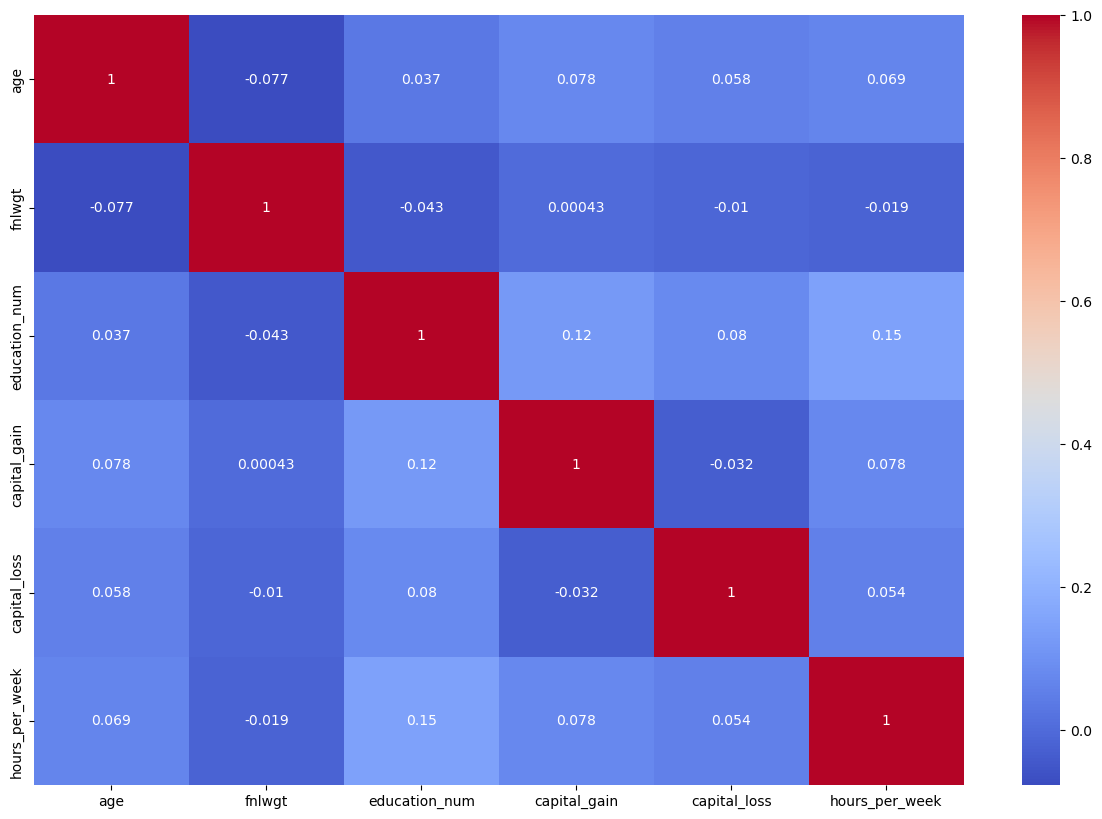

In [48]:
plt.figure(figsize=(15, 10))
sns.heatmap(adult_df.corr(), annot=True, cmap='coolwarm')

Income according to age.

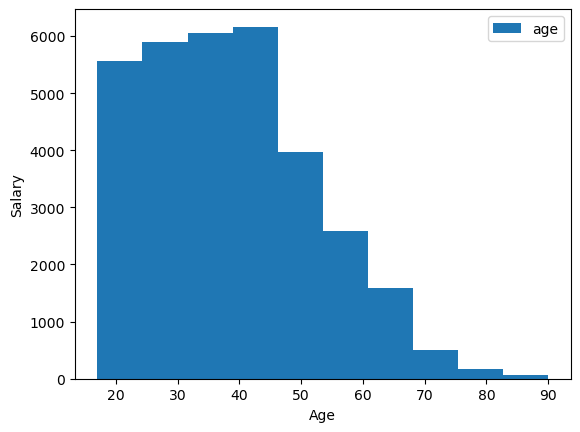

In [49]:

adult_df.plot('income','age',kind='hist')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()


Pair Plot

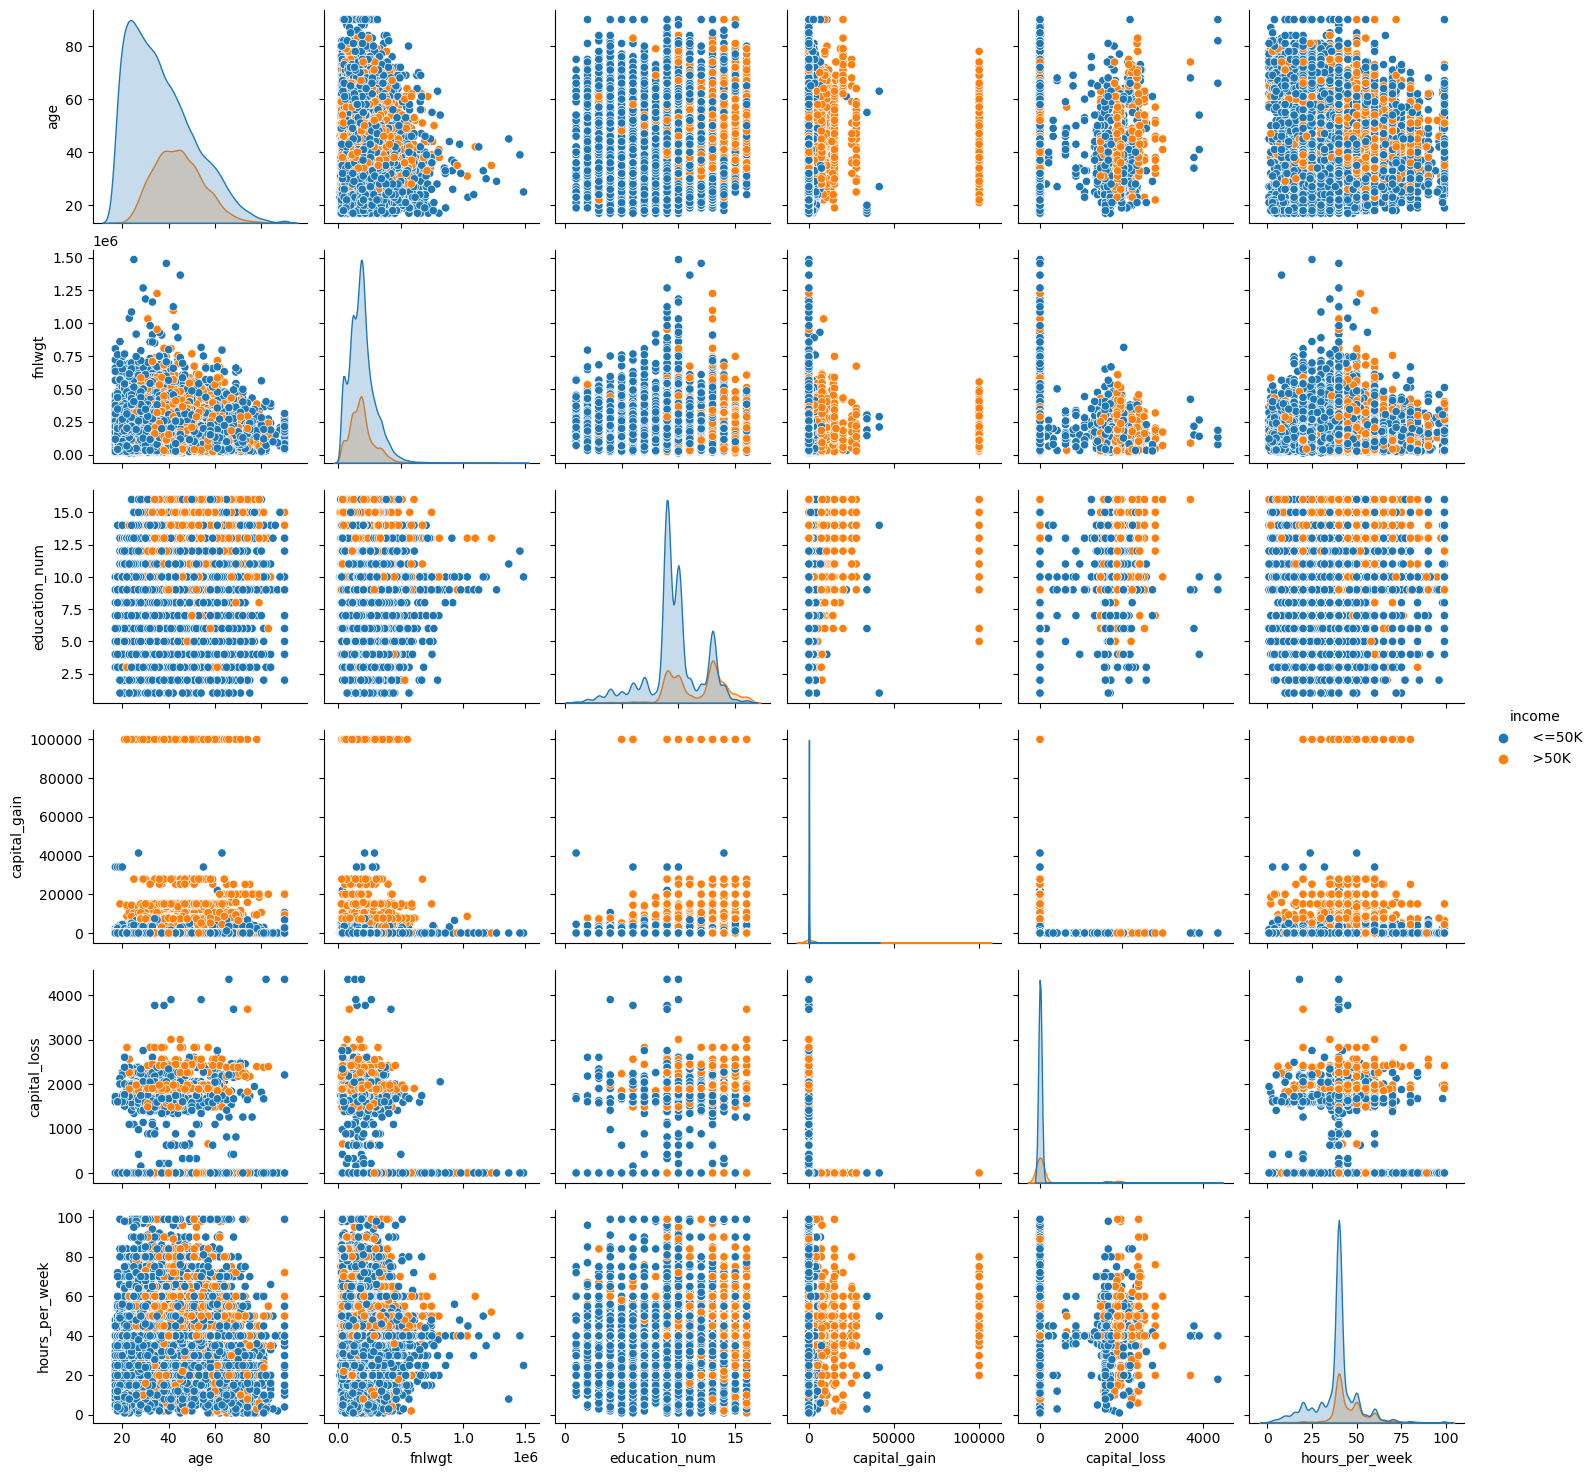

In [50]:
sns.pairplot(adult_df,hue = 'income')

In [51]:
adult_df_rev=pd.DataFrame.copy(adult_df)    #Rename the Data Frame

In [52]:
adult_df_rev=adult_df_rev.drop(['education','fnlwgt'],axis=1)        #Drop the columns which are not required.
adult_df_rev.shape

(32561, 13)

In [53]:
adult_df_rev.isnull().sum()

age                0
workclass          0
education_num      0
maritial_status    0
occupation         0
relationship       0
race               0
sex                0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64

In [54]:
for i in adult_df_rev.columns:
    print({i:adult_df_rev[i].unique()})

{'age': array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)}
{'workclass': array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)}
{'education_num': array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)}
{'maritial_status': array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)}
{'occupation': array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-

In [55]:
adult_df_rev=adult_df_rev.replace(' ?',np.nan)     #Replace ? with np.nan

In [56]:
adult_df_rev.isnull().sum()

age                   0
workclass          1836
education_num         0
maritial_status       0
occupation         1843
relationship          0
race                  0
sex                   0
capital_gain          0
capital_loss          0
hours_per_week        0
native_country      583
income                0
dtype: int64

In [57]:
##replace the missing values with mode
for value in ['workclass','occupation','native_country']:
    adult_df_rev[value].fillna(adult_df_rev[value].mode()[0],inplace=True)

In [58]:
adult_df_rev.isnull().sum()

age                0
workclass          0
education_num      0
maritial_status    0
occupation         0
relationship       0
race               0
sex                0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64

In [59]:
adult_df_rev

,age,workclass,education_num,maritial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


One hot encoding (in this case it will not go as we have many columns increased from 19 to 90 size of data set increased drastically)

In [60]:
adult_df_rev_new=pd.get_dummies(adult_df_rev)
adult_df_rev_new

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,53,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,28,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,38,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
32557,40,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
32558,58,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
32559,22,9,0,0,20,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [61]:
adult_df_rev_new.shape

(32561, 90)

In [62]:
colname=[]                                        #Checking the object columns
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype=='object':
        colname.append(x)
colname

['workclass',
 'maritial_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

Using LabelEncoder

In [63]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
 
for x in colname:
    adult_df_rev[x]=le.fit_transform(adult_df_rev[x])
 
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print('Feature', x)
print('mapping', le_name_mapping)

Feature income
mapping {' <=50K': 0, ' >50K': 1}


In [64]:
adult_df_rev.head()

,age,workclass,education_num,maritial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [65]:
adult_df_rev.shape

(32561, 13)

In [66]:
x=adult_df_rev.values[:,0:-1]
y=adult_df_rev.values[:,-1]

In [67]:
x.shape

(32561, 12)

In [68]:
y.shape

(32561,)

In [69]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(x)
x=scaler.transform(x)

In [70]:
print(x)

[[ 0.03067056  2.62429763  1.13473876 ... -0.21665953 -0.03542945
   0.26136999]
 [ 0.83710898  1.72109965  1.13473876 ... -0.21665953 -2.22215312
   0.26136999]
 [-0.04264203 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 ...
 [ 1.42360965 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 [-1.21564337 -0.08529633 -0.42005962 ... -0.21665953 -1.65522476
   0.26136999]
 [ 0.98373415  0.81790166 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]]


In [71]:
from sklearn.model_selection import train_test_split
 
#split the data into  the test and train
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=10)
 
## test_size is 20%  for less than 10000 obsevation and greater than 10000 30%

In [72]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(22792, 12)
(22792,)
(9769, 12)
(9769,)


In [73]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Model building

In [74]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#fitting training data into the model
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
#print(y-pred)
print(list(zip(y_test,y_pred)))

[(0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 1), (0, 0), (0, 0), (1, 0), (1, 1), (1, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 1), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (1, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
 
print('classification report: ',)
print(classification_report(y_test,y_pred))
 
acc=accuracy_score(y_test,y_pred)
print('accuracy of the model: ',acc)

[[7017  406]
 [1316 1030]]
classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

accuracy of the model:  0.8237281195618794


# Tuning

In [76]:
#store the predicted probabilities
y_pred_prob=classifier.predict_proba(x_test)
print(y_pred_prob)

[[0.96864575 0.03135425]
 [0.97034188 0.02965812]
 [0.23865176 0.76134824]
 ...
 [0.81409634 0.18590366]
 [0.8253398  0.1746602 ]
 [0.1567105  0.8432895 ]]


In [77]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.46:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(y_test,y_pred_class)
print(cfm)
 
print('classification report: ',)
print(classification_report(y_test,y_pred_class))
 
acc=accuracy_score(y_test,y_pred_class)
print('accuracy of the model: ',acc)

[[6910  513]
 [1208 1138]]
classification report: 
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7423
           1       0.69      0.49      0.57      2346

    accuracy                           0.82      9769
   macro avg       0.77      0.71      0.73      9769
weighted avg       0.81      0.82      0.81      9769

accuracy of the model:  0.8238304841846658


Model after tuning (reducing the type 2 error)

In [79]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 1768  , type 2 error : 1072  , type 1 error: 696
Errors at threshold  0.41000000000000003 : 1747  , type 2 error : 1096  , type 1 error: 651
Errors at threshold  0.42000000000000004 : 1749  , type 2 error : 1115  , type 1 error: 634
Errors at threshold  0.43000000000000005 : 1760  , type 2 error : 1144  , type 1 error: 616
Errors at threshold  0.44000000000000006 : 1752  , type 2 error : 1168  , type 1 error: 584
Errors at threshold  0.45000000000000007 : 1734  , type 2 error : 1189  , type 1 error: 545
Errors at threshold  0.4600000000000001 : 1721  , type 2 error : 1208  , type 1 error: 513
Errors at threshold  0.4700000000000001 : 1717  , type 2 error : 1232  , type 1 error: 485
Errors at threshold  0.4800000000000001 : 1727  , type 2 error : 1268  , type 1 error: 459
Errors at threshold  0.4900000000000001 : 1722  , type 2 error : 1295  , type 1 error: 427
Errors at threshold  0.5000000000000001 : 1722  , type 2 error : 1316  , type 1 error: 406
Errors at

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(y_test,y_pred_class)
print(cfm)
 
print('classification report: ',)
print(classification_report(y_test,y_pred_class))
 
acc=accuracy_score(y_test,y_pred_class)
print('accuracy of the model: ',acc)

[[6910  513]
 [1208 1138]]
classification report: 
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7423
           1       0.69      0.49      0.57      2346

    accuracy                           0.82      9769
   macro avg       0.77      0.71      0.73      9769
weighted avg       0.81      0.82      0.81      9769

accuracy of the model:  0.8238304841846658


# K Nearest Neighbors (KNN)

In [81]:
##predicting using the KNeighbors_classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(x_train))),
                               metric='euclidean')

#euclidean,manhattan,min kowski
#fit the model in the data and predict the values

model_KNN.fit(x_train,y_train)
y_pred=model_KNN.predict(x_test)
print(list(zip(y_test,y_pred)))

[(0, 0), (0, 0), (1, 1), (0, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (1, 1), (0, 1), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0),

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print('classification report: ',)
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print('accuracy of the model: ',acc)

[[6966  457]
 [1201 1145]]
classification report: 
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7423
           1       0.71      0.49      0.58      2346

    accuracy                           0.83      9769
   macro avg       0.78      0.71      0.74      9769
weighted avg       0.82      0.83      0.82      9769

accuracy of the model:  0.8302794554202068


ACCURACY OF MODEL USING DECISION TREE IS 83%

# Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(random_state=10)

#fit the model on data and predict the values

model_DecisionTree.fit(x_train,y_train)

y_pred=model_DecisionTree.predict(x_test)

#print(y_pred)
#print(list(zip(y_test,y_pred)))

In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print('classification report: ',)
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print('accuracy of the model: ',acc)

[[6567  856]
 [ 927 1419]]
classification report: 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7423
           1       0.62      0.60      0.61      2346

    accuracy                           0.82      9769
   macro avg       0.75      0.74      0.75      9769
weighted avg       0.82      0.82      0.82      9769

accuracy of the model:  0.8174838775719111


# Random Forest

In [85]:
#predicting using random forest classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=100, random_state=10)

##fit the model in the data and predict the values

model_RandomForest.fit(x_train,y_train)

y_pred=model_RandomForest.predict(x_test)

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print('classification report: ',)
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print('accuracy of the model: ',acc)

[[6851  572]
 [ 905 1441]]
classification report: 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7423
           1       0.72      0.61      0.66      2346

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769

accuracy of the model:  0.8488074521445389


In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)


best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print('classification report: ',)
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print('accuracy of the model: ',acc)

[[6851  572]
 [ 905 1441]]
classification report: 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7423
           1       0.72      0.61      0.66      2346

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769

accuracy of the model:  0.8488074521445389


ACCURACY OF MODEL USING Random Forest IS 85%

# Support Vector Machine

In [89]:
from sklearn.svm import SVC
#create a model
svc_model=SVC(kernel='rbf',C=90,gamma=0.1)
#fitting training data into the model
svc_model.fit(x_train,y_train)
y_pred=svc_model.predict(x_test)
print(y_pred)
print(list(zip(y_test,y_pred)))

[0 0 1 ... 0 0 0]
[(0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 1), (1, 1), (1, 1), (0, 1), (1, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print('classification report: ',)
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print('accuracy of the model: ',acc)

[[6894  529]
 [ 988 1358]]
classification report: 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7423
           1       0.72      0.58      0.64      2346

    accuracy                           0.84      9769
   macro avg       0.80      0.75      0.77      9769
weighted avg       0.84      0.84      0.84      9769

accuracy of the model:  0.8447128672330843


# EXTRA TREES CLASSIFIER

In [91]:
#predicting using extra trees classifier
from sklearn.ensemble import ExtraTreesClassifier

model_ExtraTrees=ExtraTreesClassifier(n_estimators=200, random_state=10)

##fit the model in the data and predict the values

model_ExtraTrees.fit(x_train,y_train)

y_pred=model_ExtraTrees.predict(x_test)

In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print('classification report: ',)
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print('accuracy of the model: ',acc)

[[6810  613]
 [ 918 1428]]
classification report: 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7423
           1       0.70      0.61      0.65      2346

    accuracy                           0.84      9769
   macro avg       0.79      0.76      0.77      9769
weighted avg       0.84      0.84      0.84      9769

accuracy of the model:  0.8432797625140751


ACCURACY OF MODEL USING Extra Tree Classifier IS 84%

# ADABOOST CLASSIFIER

In [93]:
#predicting using ada_boostclassifier
from sklearn.ensemble import AdaBoostClassifier

model_AdaBoost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=10),
                                  n_estimators=100,random_state=10)

##fit the model in the data and predict the values

model_AdaBoost.fit(x_train,y_train)

y_pred=model_AdaBoost.predict(x_test)

In [94]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print('classification report: ',)
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print('accuracy of the model: ',acc)

[[6540  883]
 [ 815 1531]]
classification report: 
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      7423
           1       0.63      0.65      0.64      2346

    accuracy                           0.83      9769
   macro avg       0.76      0.77      0.76      9769
weighted avg       0.83      0.83      0.83      9769

accuracy of the model:  0.8261848705087522


# GRADIENT BOOSTING CLASSIFIER

In [95]:
#predicting using ada_boostclassifier
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(n_estimators=100,random_state=10)

##fit the model in the data and predict the values

model_GradientBoosting.fit(x_train,y_train)

y_pred=model_GradientBoosting.predict(x_test)

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print('classification report: ',)
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print('accuracy of the model: ',acc)

[[7035  388]
 [ 966 1380]]
classification report: 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7423
           1       0.78      0.59      0.67      2346

    accuracy                           0.86      9769
   macro avg       0.83      0.77      0.79      9769
weighted avg       0.86      0.86      0.85      9769

accuracy of the model:  0.8613983007472618


ACCURACY OF MODEL USING  GRADIENT BOOSTING CLASSIFIER IS 86%

In [97]:
! pip install xgboost

# XG BOOST

In [102]:
from xgboost import XGBClassifier

model_xgb=XGBClassifier(n_estimators=100,random_state=10)

##fit the model in the data and predict the values

model_xgb.fit(x_train,y_train)

y_pred=model_xgb.predict(x_test)

In [103]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print('classification report: ',)
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print('accuracy of the model: ',acc)

[[6943  480]
 [ 784 1562]]
classification report: 
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7423
           1       0.76      0.67      0.71      2346

    accuracy                           0.87      9769
   macro avg       0.83      0.80      0.81      9769
weighted avg       0.87      0.87      0.87      9769

accuracy of the model:  0.8706111167980346


ACCURACY OF MODEL USING  XG BOOST CLASSIFIER IS 87%

# MODEL COMPARISION

# Conclusion

All the models mentioned above achieved impressive accuracy, however XGBoost Classifier, an advanced ensemble machine learning algorithm, standing out by delivering the highest accuracy of 87% while also demonstrating the lowest type two error. This achievement is further supported by notable precision (0.76), recall (0.67), and F1-score (0.71) for Class 1 (the positive class). The overall accuracy of 87% reflects the model's strong overall performance in terms of correctness. Taking all aspects into account, it's evident that the XGBoost Classifier Algorithm outperforms the others across the board, making it the preferred choice for this task. Therefore, we will proceed with the utilization of the XGBoost Classifier Model.